In [ ]:
import pandas as pd
from google.colab import drive
df= pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [ ]:
print(df.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [ ]:
print(df.describe)
print(df.info)

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.size)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
0
18208


In [ ]:
# Import datasets here if Step 1 was not run
from sklearn import datasets
import pandas as pd

cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=cancer.feature_names)
df["target"] = y

print("First 5 rows of dataset:")
print(df.head())

print("\nTarget names:", cancer.target_names)
print("Dataset shape:", df.shape)


First 5 rows of dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wor

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 398
Testing set size: 171


In [ ]:
# Create Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

# Train model
nb_model.fit(X_train, y_train)

print("✅ Naïve Bayes model trained successfully")


✅ Naïve Bayes model trained successfully


In [ ]:
y_pred = nb_model.predict(X_test)

print("Sample Predictions:", y_pred[:10])
print("Actual Labels:    ", y_test[:10])


Sample Predictions: [0 1 1 0 1 0 1 0 1 0]
Actual Labels:     [0 1 1 0 0 0 1 0 1 0]



✅ Accuracy of Naïve Bayes model: 0.9473684210526315

📌 Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


📊 Confusion Matrix:
 [[ 57   7]
 [  2 105]]


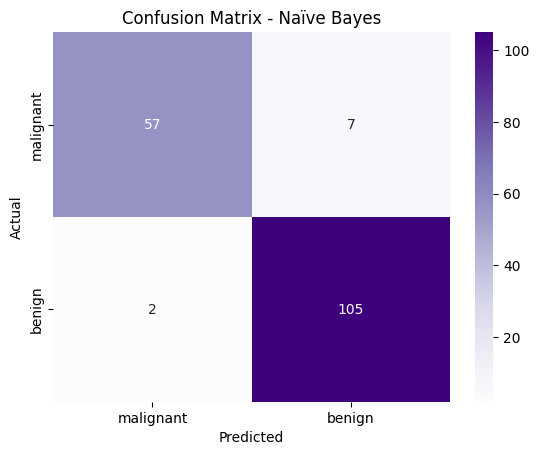

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy of Naïve Bayes model:", accuracy)

print("\n📌 Classification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", cm)

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",
            xticklabels=cancer.target_names,
            yticklabels=cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()
